# Imports

In [49]:
import json
import requests

from datetime import datetime, timedelta, timezone, time, date
from itertools import product
from functools import reduce
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run desktop/opentransit-metrics/mykelu/eclipses.py
%run desktop/opentransit-metrics/mykelu/get_stops.py

In [50]:
%matplotlib inline

In [3]:
stops = pd.read_csv('desktop/opentransit-metrics/mykelu/stops.csv')

# Get Possible Routes

In [4]:
test_stops = stops[stops.apply(lambda x: (x['ROUTE'] == 14) & (x['DID'] == '14___O_F00'), axis = 'columns')]

In [5]:
joined_stops = test_stops.join(test_stops.set_index('VID'), on = 'VID', how = 'inner', lsuffix = 'start', rsuffix = 'end')

In [6]:
valid_trips = joined_stops[joined_stops.apply(lambda x: (x['TIMEstart'] < x['TIMEend']) & (x['DATEstart'] == x['DATEend']), axis = 'columns')]

In [66]:
valid_trips

,DATEstart,DIDstart,ROUTEstart,SIDstart,TIMEstart,VID,timestampstart,DATEend,DIDend,ROUTEend,SIDend,TIMEend,timestampend
32,2018-11-12,14___O_F00,14,6498,1.542010e+09,7225,2018-11-12 08:00:13-08:00,2018-11-12,14___O_F00,14,5623,1.542010e+09,2018-11-12 08:00:43-08:00
32,2018-11-12,14___O_F00,14,6498,1.542010e+09,7225,2018-11-12 08:00:13-08:00,2018-11-12,14___O_F00,14,5579,1.542010e+09,2018-11-12 08:01:43-08:00
32,2018-11-12,14___O_F00,14,6498,1.542010e+09,7225,2018-11-12 08:00:13-08:00,2018-11-12,14___O_F00,14,5528,1.542010e+09,2018-11-12 08:03:43-08:00
32,2018-11-12,14___O_F00,14,6498,1.542010e+09,7225,2018-11-12 08:00:13-08:00,2018-11-12,14___O_F00,14,5529,1.542010e+09,2018-11-12 08:05:44-08:00
32,2018-11-12,14___O_F00,14,6498,1.542010e+09,7225,2018-11-12 08:00:13-08:00,2018-11-12,14___O_F00,14,5532,1.542010e+09,2018-11-12 08:06:44-08:00
32,2018-11-12,14___O_F00,14,6498,1.542010e+09,7225,2018-11-12 08:00:13-08:00,2018-11-12,14___O_F00,14,5534,1.542010e+09,2018-11-12 08:07:44-08:00
32,2018-11-12,14___O_F00,14,6498,1.542010e+09,7225,2018-11-12 08:00:13-08:00,2018-11-12,14___O_F00,14,5536,1.542010e+09,2018-11-12 08:09:44-08:00
32,2018-11-12,14___O_F00,14,6498,1.542010e+09,7225,2018-11-12 08:00:13-08:00,2018-11-12,14___O_F00,14,5538,1.542010e+09,2018-11-12 08:10:44-08:00
32,2018-11-12,14___O_F00,14,6498,1.542010e+09,7225,2018-11-12 08:00:13-08:00,2018-11-12,14___O_F00,14,5539,1.542010e+09,2018-11-12 08:11:44-08:00
32,2018-11-12,14___O_F00,14,6498,1.542010e+09,7225,2018-11-12 08:00:13-08:00,2018-11-12,14___O_F00,14,5540,1.542010e+09,2018-11-12 08:13:44-08:00


# Find Time Between Stops

In [7]:
sample_trips = valid_trips[valid_trips.apply(lambda x: (x['SIDstart'] == 5528) & (x['SIDend'] == 5545), axis = 'columns')]

In [8]:
sample_trips.head()

,DATEstart,DIDstart,ROUTEstart,SIDstart,TIMEstart,VID,timestampstart,DATEend,DIDend,ROUTEend,SIDend,TIMEend,timestampend
97,2018-11-12,14___O_F00,14,5528,1.542010e+09,7225,2018-11-12 08:03:43-08:00,2018-11-12,14___O_F00,14,5545,1.542011e+09,2018-11-12 08:17:44-08:00
97,2018-11-12,14___O_F00,14,5528,1.542010e+09,7225,2018-11-12 08:03:43-08:00,2018-11-12,14___O_F00,14,5545,1.542019e+09,2018-11-12 10:44:36-08:00
2246,2018-11-12,14___O_F00,14,5528,1.542019e+09,7225,2018-11-12 10:29:51-08:00,2018-11-12,14___O_F00,14,5545,1.542019e+09,2018-11-12 10:44:36-08:00
4775,2018-11-13,14___O_F00,14,5528,1.542105e+09,7286,2018-11-13 10:22:29-08:00,2018-11-13,14___O_F00,14,5545,1.542105e+09,2018-11-13 10:33:59-08:00
7111,2018-11-14,14___O_F00,14,5528,1.542190e+09,7286,2018-11-14 10:04:52-08:00,2018-11-14,14___O_F00,14,5545,1.542191e+09,2018-11-14 10:22:53-08:00


In [9]:
sample_trips['triplength'] = sample_trips['TIMEend'] - sample_trips['TIMEstart']

C:\Users\jose\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
trip_times = sample_trips.pivot_table(values = ['triplength'], index = ['VID', 'timestampstart'], aggfunc = np.min)

# Compute Summary Statistics

In [19]:
trip_times.describe()

,triplength
count,59.000000
mean,907.593220
std,226.081929
min,540.000000
25%,728.000000
50%,886.000000
75%,1021.000000
max,1876.000000


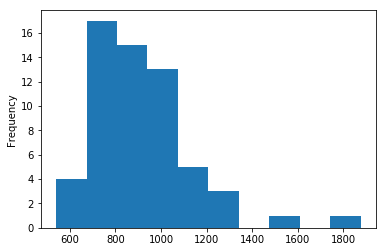

In [52]:
trip_times['triplength'].plot('hist')

In [58]:
def find_route_times(df, start_stop, end_stop, route):
    """
    find_route_times
    
    Finds the length of every trip between two stops.

    Call get_stops first and filter (dates, directions, etc)
    """
    # get the set of possible stops
    joined_stops = df.join(df.set_index('VID'), on = 'VID', how = 'inner', lsuffix = 'start', rsuffix = 'end')
    valid_trips = joined_stops[joined_stops.apply(lambda x: (x['TIMEstart'] < x['TIMEend']) & (x['DATEstart'] == x['DATEend']) & 
                                                            (x['SIDstart'] == 5528) & (x['SIDend'] == 5545), axis = 'columns')]
    # get trip times
    valid_trips['triplength'] = valid_trips['TIMEend'] - valid_trips['TIMEstart']
    
    # the actual trip time will be the shortest trip in the joined dataframe between the start and stop
    return valid_trips.pivot_table(values = ['triplength'], index = ['VID', 'timestampstart'], aggfunc = np.min)

In [62]:
find_route_times(test_stops, 5528, 5545, 14).describe()

C:\Users\jose\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,triplength
count,59.000000
mean,907.593220
std,226.081929
min,540.000000
25%,728.000000
50%,886.000000
75%,1021.000000
max,1876.000000


# Find Duplicate Stops

In [11]:
stops.iloc[[2777, 2801]]

,DATE,DID,ROUTE,SID,TIME,VID,timestamp
2777,2018-11-12,14___O_F00,14,5528,1.542020e+09,7220,2018-11-12 11:00:37-08:00
2801,2018-11-12,14___O_F00,14,5529,1.542020e+09,7220,2018-11-12 11:00:37-08:00


In [12]:
stops[stops.apply(lambda x: (x['VID'] == 7220) & (x['SID'] >= 5528) & (x['SID'] <= 5545), axis = 'columns')].sort_values('timestamp')

,DATE,DID,ROUTE,SID,TIME,VID,timestamp
87,2018-11-12,14___I_F00,14,5544,1.542010e+09,7220,2018-11-12 08:02:43-08:00
100,2018-11-12,14___I_F00,14,5542,1.542010e+09,7220,2018-11-12 08:03:59-08:00
111,2018-11-12,14___I_F00,14,5541,1.542010e+09,7220,2018-11-12 08:04:44-08:00
134,2018-11-12,14___I_F00,14,5537,1.542010e+09,7220,2018-11-12 08:06:44-08:00
152,2018-11-12,14___I_F00,14,5535,1.542010e+09,7220,2018-11-12 08:07:44-08:00
175,2018-11-12,14___I_F00,14,5533,1.542010e+09,7220,2018-11-12 08:09:44-08:00
211,2018-11-12,14___I_F00,14,5531,1.542010e+09,7220,2018-11-12 08:12:44-08:00
232,2018-11-12,14___I_F00,14,5530,1.542010e+09,7220,2018-11-12 08:14:44-08:00
543,2018-11-12,14___O_F00,14,5528,1.542012e+09,7220,2018-11-12 08:37:45-08:00
552,2018-11-12,14___O_F00,14,5529,1.542012e+09,7220,2018-11-12 08:38:45-08:00


In [13]:
# TODO:
# deal with buses switching routes? (ex/end of outbound => beginning of inbound)

In [14]:
duplicate_stops = stops.join(stops.set_index('timestamp'), on = 'timestamp', how = 'inner', lsuffix = 'start', rsuffix = 'end')

In [15]:
duplicate_stops = duplicate_stops[duplicate_stops.apply(lambda x: (x['VIDstart'] == x['VIDend']) & (x['SIDstart'] != x['SIDend']), axis = 'columns')]

In [22]:
# get rid of mirrored pairs
duplicate_stops = duplicate_stops[duplicate_stops.apply(lambda x: x['SIDstart'] < x['SIDend'], axis = 'columns')]

In [23]:
duplicate_stops

,DATEstart,DIDstart,ROUTEstart,SIDstart,TIMEstart,VIDstart,timestamp,DATEend,DIDend,ROUTEend,SIDend,TIMEend,VIDend
1,2018-11-12,12___O_F00,12,6328,1.542010e+09,8728,2018-11-12 08:00:13-08:00,2018-11-12,12___O_F00,12,7863,1.542010e+09,8728
2,2018-11-12,14___I_F00,14,5610,1.542010e+09,7283,2018-11-12 08:00:13-08:00,2018-11-12,14___I_F00,14,5615,1.542010e+09,7283
3,2018-11-12,14___I_F00,14,5582,1.542010e+09,7283,2018-11-12 08:00:13-08:00,2018-11-12,14___I_F00,14,5610,1.542010e+09,7283
3,2018-11-12,14___I_F00,14,5582,1.542010e+09,7283,2018-11-12 08:00:13-08:00,2018-11-12,14___I_F00,14,5586,1.542010e+09,7283
3,2018-11-12,14___I_F00,14,5582,1.542010e+09,7283,2018-11-12 08:00:13-08:00,2018-11-12,14___I_F00,14,5615,1.542010e+09,7283
4,2018-11-12,14___I_F00,14,5586,1.542010e+09,7283,2018-11-12 08:00:13-08:00,2018-11-12,14___I_F00,14,5610,1.542010e+09,7283
4,2018-11-12,14___I_F00,14,5586,1.542010e+09,7283,2018-11-12 08:00:13-08:00,2018-11-12,14___I_F00,14,5615,1.542010e+09,7283
6,2018-11-12,14___I_F00,14,5583,1.542010e+09,7229,2018-11-12 08:00:13-08:00,2018-11-12,14___I_F00,14,7841,1.542010e+09,7229
7,2018-11-12,14___I_F00,14,5571,1.542010e+09,7229,2018-11-12 08:00:13-08:00,2018-11-12,14___I_F00,14,5583,1.542010e+09,7229
7,2018-11-12,14___I_F00,14,5571,1.542010e+09,7229,2018-11-12 08:00:13-08:00,2018-11-12,14___I_F00,14,7841,1.542010e+09,7229


In [26]:
start_time = int(datetime.strptime(f"2018-11-12 08:00 -0800", "%Y-%m-%d %H:%M %z").timestamp())*1000
end_time   = int(datetime.strptime(f"2018-11-12 10:00 -0800", "%Y-%m-%d %H:%M %z").timestamp())*1000

query = f"""{{
    trynState(agency: "muni",
                startTime: "{start_time}",
                endTime: "{end_time}",
                routes: ["12", "14"]) {{
        routes {{
            stops {{
                sid
                lat
                lon
            }}
        }}
    }}
}}
"""
query_url = f"https://06o8rkohub.execute-api.us-west-2.amazonaws.com/dev/graphql?query={query}"

In [27]:
request = requests.get(query_url)

In [37]:
stops = request.json()['data']['trynState']['routes'][0]['stops'] + request.json()['data']['trynState']['routes'][1]['stops']

In [43]:
stop_coords = {int(stop['sid']):(stop['lat'], stop['lon']) for stop in stops}

In [46]:
duplicate_stops['dist'] = duplicate_stops[['SIDstart', 'SIDend']].apply(lambda x: haver_distance(stop_coords[x['SIDstart']][0], stop_coords[x['SIDstart']][1], stop_coords[x['SIDend']][0], stop_coords[x['SIDend']][1]), axis = 'columns')

C:\Users\jose\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
duplicate_stops['dist'].describe()

count    2088.000000
mean      348.240251
std       222.978836
min        24.828449
25%       176.171172
50%       276.069183
75%       463.797855
max      1386.209621
Name: dist, dtype: float64

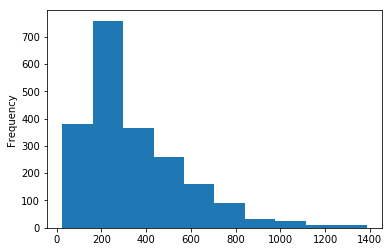

In [51]:
duplicate_stops['dist'].plot('hist')

# Get Ordered List of Stops

In [71]:
request.json()['data']['trynState']['routes']

[{'stops': [{'sid': '7941', 'lat': 37.7939599, 'lon': -122.42219},
   {'sid': '5859', 'lat': 37.79478, 'lon': -122.4228999},
   {'sid': '5851', 'lat': 37.795, 'lon': -122.42125},
   {'sid': '5844', 'lat': 37.79515, 'lon': -122.4200299},
   {'sid': '5839', 'lat': 37.7953799, 'lon': -122.41839},
   {'sid': '5846', 'lat': 37.79559, 'lon': -122.4167399},
   {'sid': '5841', 'lat': 37.79579, 'lon': -122.4150999},
   {'sid': '5857', 'lat': 37.796, 'lon': -122.4134599},
   {'sid': '5848', 'lat': 37.7962099, 'lon': -122.41181},
   {'sid': '5853', 'lat': 37.7964099, 'lon': -122.41017},
   {'sid': '3087', 'lat': 37.7975899, 'lon': -122.40829},
   {'sid': '3082', 'lat': 37.7978299, 'lon': -122.40634},
   {'sid': '3084', 'lat': 37.7981299, 'lon': -122.40396},
   {'sid': '7862', 'lat': 37.79839, 'lon': -122.4023399},
   {'sid': '7863', 'lat': 37.79653, 'lon': -122.40191},
   {'sid': '6328', 'lat': 37.79447, 'lon': -122.40149},
   {'sid': '6327', 'lat': 37.7931799, 'lon': -122.40122},
   {'sid': '633